<a href="https://colab.research.google.com/github/rtRitesh-rgb/colab-push/blob/Used_Car_Price_Prediction/Used_Car_Price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Used_Car_Price_Prediction.csv")

print("Dataset Loaded Successfully!")
print(df.head())
print(df.info())


Dataset Loaded Successfully!
            car_name  yr_mfr fuel_type  kms_run  sale_price   city  \
0       maruti swift    2015    petrol     8063      386399  noida   
1    maruti alto 800    2016    petrol    23104      265499  noida   
2  hyundai grand i10    2017    petrol    23402      477699  noida   
3       maruti swift    2013    diesel    39124      307999  noida   
4  hyundai grand i10    2015    petrol    22116      361499  noida   

   times_viewed  body_type transmission          variant  ...  total_owners  \
0         18715  hatchback       manual          lxi opt  ...             2   
1          2676  hatchback       manual              lxi  ...             1   
2           609  hatchback       manual  sports 1.2 vtvt  ...             1   
3          6511  hatchback       manual              vdi  ...             1   
4          3225  hatchback       manual   magna 1.2 vtvt  ...             1   

  broker_quote original_price  car_rating            ad_created_on  \
0    

In [ ]:
#Check Missing Values
print(df.isnull().sum())


car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64


In [ ]:
#Remove rows with missing important values
df = df.dropna(subset=['sale_price', 'yr_mfr', 'kms_run'])

In [ ]:
#Remove duplicates
df = df.drop_duplicates()

In [ ]:
#Handle categorical inconsistencies
df['fuel_type'] = df['fuel_type'].str.lower()
df['transmission'] = df['transmission'].str.lower()

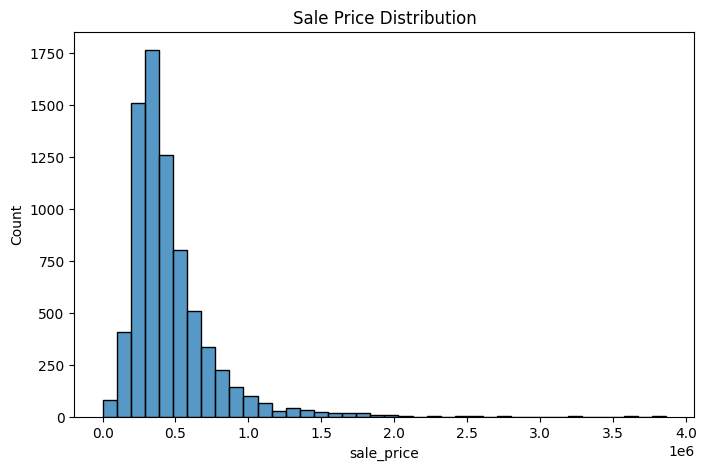

In [ ]:
#Distribution of Sale Price
plt.figure(figsize=(8,5))
sns.histplot(df['sale_price'], bins=40)
plt.title("Sale Price Distribution")
plt.show()

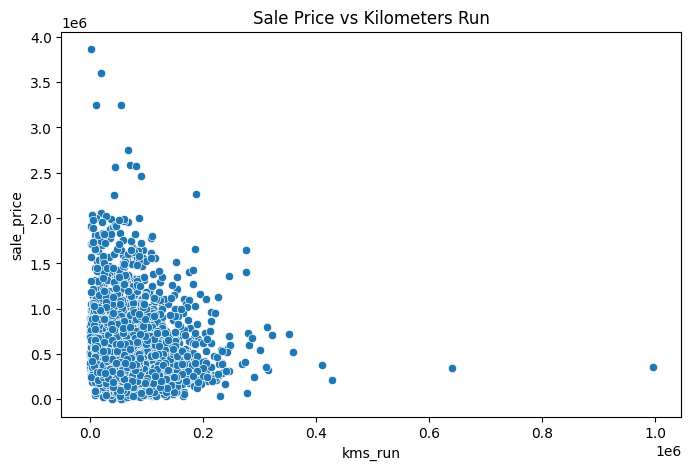

In [ ]:
#Scatter Plot: Kms Run vs Sale Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['kms_run'], y=df['sale_price'])
plt.title("Sale Price vs Kilometers Run")
plt.show()

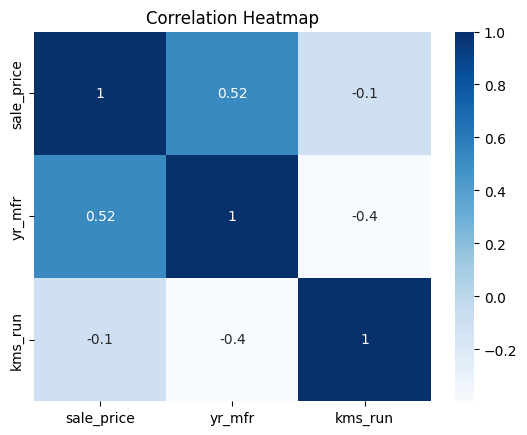

In [ ]:
#Correlation Heatmap (Simplified)
numeric = df[['sale_price', 'yr_mfr', 'kms_run']]
sns.heatmap(numeric.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data = df[['sale_price', 'yr_mfr', 'kms_run']]
X = data[['yr_mfr', 'kms_run']]
y = data['sale_price']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score

print("Linear Regression R2 Score:", r2_score(y_test, y_pred))


Linear Regression R2 Score: 0.26996989580239195


In [ ]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})
print(coeff)


   Feature   Coefficient
0   yr_mfr  51148.441637
1  kms_run      0.731694
